In [5]:
import pandas as pd
from datetime import datetime
# helper function: sentiment classifier using TimeLMS pretrained model
from social_media_sentiment_classifier import *  
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})

earliest datetime:  2020-10-01 00:00:00
latest datetime:  2022-03-26 00:00:00
Removing non-English tweets...
Number of rows start:  100200
Number of rows left:  84416
             id       date      time       username  \
0  1.370000e+18 2021-02-28   0:52:48  davidzhorvath   
1  1.370000e+18 2021-02-27  20:07:42    starkillers   
2  1.370000e+18 2021-02-27  19:10:44             tj   
3  1.370000e+18 2021-02-27  18:40:02  john_dahlback   
4  1.370000e+18 2021-02-27   5:12:26       teedubya   

                                               tweet language  \
0  My work, one of many, from a solo show in Toky...       en   
1  #nftart article from @Forbes #zil @zilliqa get...       en   
2  More colors and info coming soon. But in the m...       en   
3  The auction has started!  https://t.co/MKFCF29...       en   
4  Here's some art I began in Nov 2008. I create ...       en   

                              mentioned_user                         forum  \
0                                

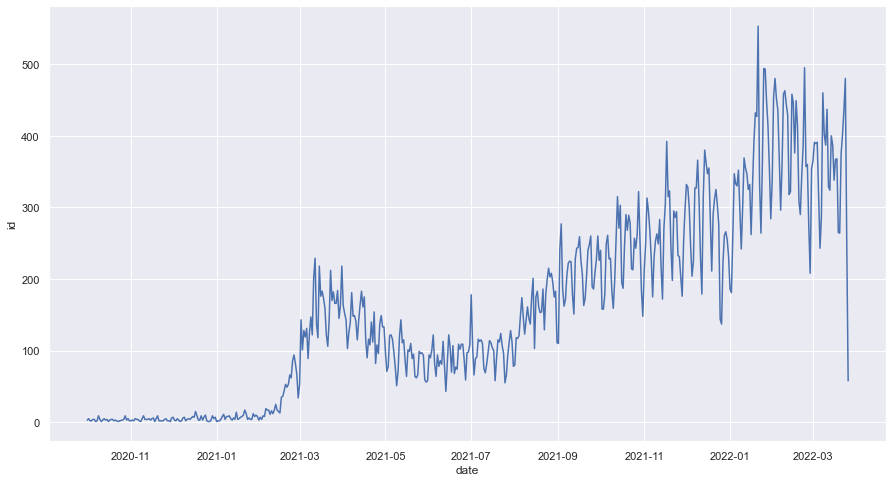

In [13]:
def read_data(path, date_treatment=None):
    df = pd.read_csv(path) # https://www.kaggle.com/datasets/adanai/verified-nft-tweets?select=verified_nft_tweets.csv 
    if date_treatment == 1:
        df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
    else:
        pass
    print('earliest datetime: ',min(df.date))
    print('latest datetime: ', max(df.date))
    # only retaining english as our model only takes in English Sentiment
    print('Removing non-English tweets...')
    print('Number of rows start: ', len(df))
    df = df[df.language == 'en']
    print('Number of rows left: ', len(df))
    print(df.head())
    # plot data
    df_grp = df.groupby('date').agg({'id':'count'})
    sns.lineplot(data=df_grp, x='date', y='id')
    plt.show()
    
    return df

path = './dataset/verified_nft_tweets.csv'
df = read_data(path, 1)

In [15]:
df_score = sentiment_score(df, column_name='tweet')
df_score.head()

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Number of rows processed:  1000
Number of rows processed:  2000
Number of rows processed:  3000
Number of rows processed:  4000
Number of rows processed:  5000
Number of rows processed:  6000
Number of rows processed:  7000
Number of rows processed:  8000
Number of rows processed:  9000
Number of rows processed:  10000
Number of rows processed:  11000
Number of rows processed:  12000
Number of rows processed:  13000
Number of rows processed:  14000
Number of rows processed:  15000
Number of rows processed:  16000
Number of rows processed:  17000
Number of rows processed:  18000
Number of rows processed:  19000
Number of rows processed:  20000
Number of rows processed:  21000
Number of rows processed:  22000
Number of rows processed:  23000
Number of rows processed:  24000
Number of rows processed:  25000
Number of rows processed:  26000
Number of rows processed:  27000
Number of rows processed:  28000
Number of rows processed:  29000
Number of rows processed:  30000
Number of rows proc

,id,date,time,username,tweet,language,mentioned_user,forum,replies_count,retweets_count,likes_count,hashtags,cashtags,quoted_user,video,reply_to_user,positive_score,negative_score,neutral_score,sentiment
0,1.370000e+18,2021-02-28,0:52:48,davidzhorvath,"My work, one of many, from a solo show in Toky...",en,[],[],1,0,9,['nftart'],[],none,1,[],0.623073,0.013336,0.363591,Positive
1,1.370000e+18,2021-02-27,20:07:42,starkillers,#nftart article from @Forbes #zil @zilliqa get...,en,"['forbes', 'zilliqa', 'mintable_app']","['www.forbes.com', 'bit.ly']",1,15,56,"['nftart', 'zil', 'nft']",[],none,0,[],0.118895,0.006305,0.874800,Neutral
2,1.370000e+18,2021-02-27,19:10:44,tj,More colors and info coming soon. But in the m...,en,[],['www.colorblocks.org'],1,1,1,"['nftart', 'nftcommunity']",[],none,0,[],0.301916,0.003726,0.694358,Neutral
3,1.370000e+18,2021-02-27,18:40:02,john_dahlback,The auction has started! https://t.co/MKFCF29...,en,['heartaake'],['foundation.app'],3,3,11,"['nftart', 'nft', 'cryptopunk', 'cryptoart']",[],none,0,[],0.474763,0.003055,0.522182,Neutral
4,1.370000e+18,2021-02-27,5:12:26,teedubya,Here's some art I began in Nov 2008. I create ...,en,"['rariblecom', 'opensea', 'niftygateway']",[],10,12,144,"['nft', 'bitcoin', 'nftart']",[],none,1,[],0.501436,0.005433,0.493131,Positive


In [16]:
df_score.to_csv('./results/sentiment_results_verified_nft_tweets.csv', index=False)

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentence = "Covid cases are increasing fast!"
analyzer.polarity_scores(sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [6]:
sentence = "NFT to the moon 🚀🚀"
analyzer.polarity_scores(sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

For new tweets

In [17]:
path_new = './dataset/nft_tweets_20220527.csv'
df_new = pd.read_csv(path_new)
df_new['date'] = pd.to_datetime(df_new['date']).dt.date
df_new.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Whitney Reid,"Fort Lauderdale, FL",Executive Vice President @bpi_sports /Founder ...,2009-12-01 21:02:01+00:00,7175,3369,9807,True,2022-06-03,Two of my favorite things…fitness and NFTs @me...,"['nft', 'Metaverse']",Twitter for iPhone,False
1,DAVID BIANCHI,Los Angeles,Actor / Filmmaker / Multimedia #NFT Artist - C...,2009-11-15 03:27:51+00:00,16435,2565,9740,True,2022-06-03,A great article on the upcoming drop @senses_n...,"['NFTdrops', 'NFTCommunity', 'nft']",Twitter Web App,False
2,unstoppable.nft,Metaverse,Unstoppable Domains is the #1 provider of #NFT...,2019-03-02 00:56:28+00:00,256155,1949,16001,True,2022-06-03,Humanity Check 🤝🏽 Badges\n\nHear directly from...,"['web3', 'crypto', 'blockchain', 'nft']",Meltwater Social,False
3,Binance NFT,NaN,@Binance #NFT Marketplace\nThe one-stop for NF...,2021-06-03 10:01:07+00:00,846973,358,1011,True,2022-06-03,We have whitelisted the smart contracts of som...,"['NFT', 'NFTs']",Twitter for iPhone,False
4,GLENNZ by Glenn Jones,NaN,"NFT's, Tshirts and other products",2008-04-18 21:55:55+00:00,16300,1162,453,True,2022-06-03,Morning Coffee just missed the bus \n0.05 ETH\...,"['Glennz', 'animation', 'nft_community', 'vect...",Twitter for iPhone,False


In [18]:
df_score_new = sentiment_score(df_new, column_name='text')
df_score_new.head()

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Number of rows processed:  1000
Number of rows processed:  2000
Number of rows processed:  3000
Number of rows processed:  3825


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,positive_score,negative_score,neutral_score,sentiment
0,Whitney Reid,"Fort Lauderdale, FL",Executive Vice President @bpi_sports /Founder ...,2009-12-01 21:02:01+00:00,7175,3369,9807,True,2022-06-03,Two of my favorite things…fitness and NFTs @me...,"['nft', 'Metaverse']",Twitter for iPhone,False,0.980294,0.001375,0.018331,Positive
1,DAVID BIANCHI,Los Angeles,Actor / Filmmaker / Multimedia #NFT Artist - C...,2009-11-15 03:27:51+00:00,16435,2565,9740,True,2022-06-03,A great article on the upcoming drop @senses_n...,"['NFTdrops', 'NFTCommunity', 'nft']",Twitter Web App,False,0.981657,0.002641,0.015702,Positive
2,unstoppable.nft,Metaverse,Unstoppable Domains is the #1 provider of #NFT...,2019-03-02 00:56:28+00:00,256155,1949,16001,True,2022-06-03,Humanity Check 🤝🏽 Badges\n\nHear directly from...,"['web3', 'crypto', 'blockchain', 'nft']",Meltwater Social,False,0.507881,0.005668,0.486451,Positive
3,Binance NFT,NaN,@Binance #NFT Marketplace\nThe one-stop for NF...,2021-06-03 10:01:07+00:00,846973,358,1011,True,2022-06-03,We have whitelisted the smart contracts of som...,"['NFT', 'NFTs']",Twitter for iPhone,False,0.770968,0.002239,0.226793,Positive
4,GLENNZ by Glenn Jones,NaN,"NFT's, Tshirts and other products",2008-04-18 21:55:55+00:00,16300,1162,453,True,2022-06-03,Morning Coffee just missed the bus \n0.05 ETH\...,"['Glennz', 'animation', 'nft_community', 'vect...",Twitter for iPhone,False,0.117110,0.170462,0.712427,Neutral


In [19]:
df_score_new.to_csv('./results/sentiment_results_verified_nft_tweets_20220527.csv', index=False)